In [1]:
import requests as req
import pandas as pd
import json
import my_utils as mu
from tqdm import tqdm
from PIL import Image
from io import BytesIO

In [ ]:
# with open('D:\\7_LOL Project\\dragontail-13.8.1\\13.8.1\\data\\ko_KR\\item.json', 'rt', encoding='utf8') as f:
#     items = json.loads(f.read())

In [2]:
with open('F:\\code\\LOL_Project\\dragontail-13.10.1\\13.10.1\data\\ko_KR\\item.json', 'rt', encoding='utf8') as f:
    items = json.loads(f.read())

In [2]:
def rawdataLoader(datas: str):
    return json.loads(datas.replace("'", '"'))

In [4]:
def itemId2Name(item_id: int):
    return items['data'][str(item_id)]['name']

In [11]:
def itemName2Id(item_name: str):
    for idx in items['data'].keys():
        if items['data'][idx]['name'] == item_name: return idx

In [5]:
def imageOpener(img_bytes: bytes):
    return Image.open(BytesIO(img_bytes))

In [3]:
with open('F:\\code\\LOL_Project\\lolproject-workspace\\Personlol_Project\\src\\main\\webapp\\resources\\dd\\img\\rune\\perk\\Scorch.png', 'rb') as f:
    image_data = f.read()

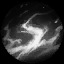

In [18]:
imageOpener(image_data).convert('L')

In [3]:
def parseRawdata(rawdata: pd.DataFrame, parse_to: int, use_tqdm: bool=False) -> pd.DataFrame:
    """
    `parse_to`: 파싱 대상 컬럼의 시작 인덱스\n
    `use_tqdm`: tqdm 출력의 사용 여부
    """
    matches = {a:[] for a in rawdata.columns[parse_to:]}

    if use_tqdm: parse_data = tqdm(rawdata.iloc)
    else: parse_data = rawdata.iloc

    for rec in parse_data:
        for col in [a for a in rawdata.columns][parse_to:]:
            matches[col].append(rawdataLoader(rec[col]))
    for col in [a for a in rawdata.columns][parse_to:]:
        rawdata[col] = matches[col]
    return rawdata

In [4]:
get_cols = [
    'game_id', 'participant_number', 'participant_name', 'champion_id', 'lane',
    'game', 'champion', 'spell', 'skill', 'skilltree', 'rune', 'item', 'kda', 'gold', 'cs', 'damage', 'vision']

get_cols = json.dumps(get_cols).replace('[', '').replace(']', '').replace('"', '')

game_id = 'KR_6496153706'
rawdata_sample = mu.oracle_totalExecute(f"SELECT {get_cols} FROM RAWDATA WHERE game_id = '{game_id}'")

oracle open!
oracle close!


In [35]:
sample2 = parseRawdata(mu.oracle_totalExecute("SELECT * FROM RAWDATA WHERE ROWNUM <= 1", debug_print=False), 10)

In [39]:
sample2.keys()

Index(['VERSION', 'GAME_CREATE_TIME', 'GAME_DURATION', 'GAME_ID',
       'PARTICIPANT_NUMBER', 'PARTICIPANT_NAME', 'CHAMPION_ID', 'LANE',
       'PARTICIPANT_PUUID', 'API_KEY', 'GAME', 'SUMMONER', 'CHAMPION', 'SPELL',
       'SKILL', 'SKILLTREE', 'RUNE', 'ITEM', 'STARTITEM', 'ITEMTREE', 'KDA',
       'GOLD', 'CS', 'TURRET', 'DAMAGE', 'VISION'],
      dtype='object')

In [ ]:
sample2['GAME'][0]

#### 소환사 전적 페이지 작성용 임시 참고 자료

In [5]:
sample = parseRawdata(rawdata_sample, 5)

In [12]:
sample.keys()

Index(['GAME_ID', 'PARTICIPANT_NUMBER', 'PARTICIPANT_NAME', 'CHAMPION_ID',
       'LANE', 'GAME', 'CHAMPION', 'SPELL', 'SKILL', 'SKILLTREE', 'RUNE',
       'ITEM', 'KDA', 'GOLD', 'CS', 'DAMAGE', 'VISION'],
      dtype='object')

In [27]:
sample['CHAMPION'][0]

{'championId': 126,
 'championName': 'Jayce',
 'champLevel': 15,
 'lane': 'TOP',
 'individualPosition': 'TOP',
 'teamPosition': 'TOP',
 'teamId': 100,
 'win': '0'}